<a href="https://colab.research.google.com/github/SohailaDiab/365-Days-of-AI/blob/main/Evaluation_Metrics_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Evaluation Metrics for Classification

In the previous session we trained a model for predicting churn. How do we know if it's good?


# 4.1 Evaluation metrics: session overview 

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


*Metric* - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'
!wget $data -O data-week-3.csv

--2022-10-17 12:10:18--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.06s   

2022-10-17 12:10:18 (16.8 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [ ]:
df = pd.read_csv('data-week-3.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [ ]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [ ]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

# 4.2 Accuracy and dummy model

* Evaluate the model on different thresholds
* Check the accuracy of dummy baselines

Accuracy tells us about the fraction of correct predictions.



```
correct predictions / total predictions
```



In [ ]:
len(y_val)

1409

In [ ]:
(y_val ==  churn_decision).mean()

0.8034066713981547

In [ ]:
# Accuracy
1132/1409

0.8034066713981547

In [ ]:
thresholds = np.linspace(0, 1, 21)
scores = []

for t in thresholds:
  churn_decision = (y_pred >= t)
  # score = accuracy_score(y_val, y_pred >= t) ....with sklearm
  score = (y_val == churn_decision).mean()
  print('%.2f %.3f' % (t, score))
  scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


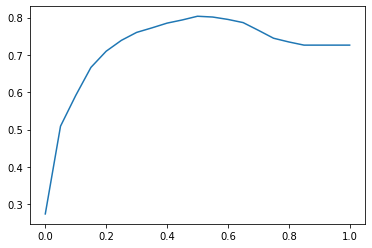

In [ ]:
plt.plot(thresholds, scores);

## Class Imbalance

We have a lot more customers who are non churning than churning ones.

In cases like this, if we predict a majority class (predict all will not churn), the model will have a good accuracy.

This is why accuracy can be misleading for cases with class imbalance.


# 4.3 Confusion Matrix
- Different types of errors and correct decisions
- Arranging them in a table

It is a way of looking at different errors the binary classification model makes.

We can get a better understanding of what kind of correct and incorrect decisions the model makes.

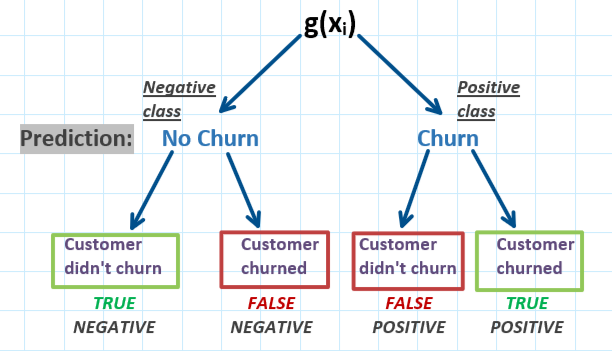

In [ ]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [ ]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [ ]:
# True predictions
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [ ]:
# False predictions
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

## Confusion Table

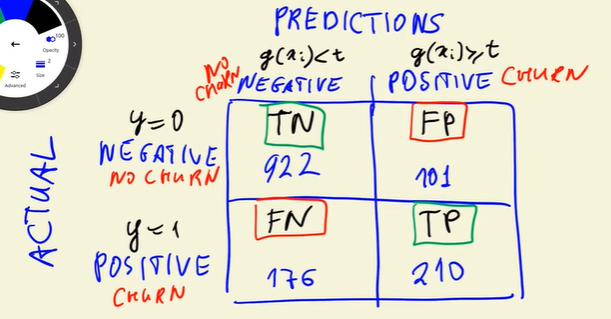

In [ ]:
# Confusion Table
confusion_matrix = np.array([[tn, fp],
                             [fn, tp]])
confusion_matrix

array([[922, 101],
       [176, 210]])

We have a lot more false negatives than false positives. 

- **False positives** would be people who get the discount email even though they weren't going to churn. (Losing money).

- **False negatives** would be people who did not get a discount email, and they were going to churn, so they leave. (Losing customers/profit)

## Normalizing confusion matrix (having percentages instead)

In [ ]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

### Accuracy 
Accuracy = (TP + TN) / (TP + TN + FP + FN)

Accuracy = 80% = 65%+18%

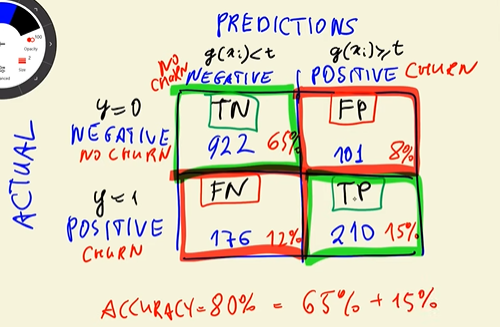

# 4.4 Precision and Recall
Metrics for evaluating binary classification models.

## Precision
**Fraction of positive predictions that are correct.**

- We predict that some customers are churning, and out of those we will get the ones that were identified correctly.

*We are only interested in the positive class (ones that predicted they'll churn)*




$Precision = \frac{ True Positive }{ Total Positive Predictions } = \frac{ True Positive }{ True Positive + False Positive } $




In [ ]:
p = tp/(tp+fp)
p, tp+fp

(0.6752411575562701, 311)

> **Percision is 67%**

This means that we will send the promotional email to `311` people, and only `210` of them were going to actually churn.

Approximately `33%` were not supposed to receive the promotional emails.

## Recall
**Fraction of correctly identified positive examples.** ... Correctly identified churning users.

*We are only interested in **TP and FN** (which is basically the customers that we predicted will be in the positive class (churn))*


$Recall = \frac{ True Positive }{ Total Positive Observations } = \frac{ True Positive }{ True Positive + False Negative } $

In [ ]:
r = tp / (tp+fn)
r, tp+fn

(0.5440414507772021, 386)

> **Recall is 54%**

This means we fail to identify `46%` of people who churn.

## Summary

**Accuracy is misleading!** 

Especially in cases where we have class imbalance like this one (churn prediction).

We had a `80%` accuracy, which seems like the model is pretty accurate.

However, when we look at precision and recal, we find out that the model is not very good.

The purpose is to identify churning users, and for this purpose accuracy is not the best metric. 

We **failed to identify 46% churning users** (*recall*) and **sent promotional emails to 33% of users who were not going to churn** (*precision*).

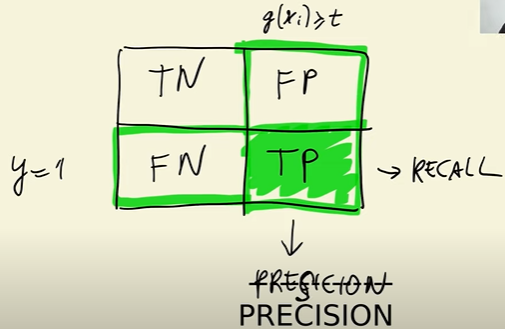

### Precision
Look at all the customers we thing are going to churn.

$Precision = \frac{ True Positive }{ True Positive + False Positive } $

### Recall
Look at all the customers that are actually churning.

$Recall = \frac{ True Positive }{ True Positive + False Negative } $

# 4.5 ROC Curves
receiver operating characteristic curve

We can see how the model behaves at different thresholds.

This is a way of describing the performance of a binary classification model.

Originally used in WWII for evaluating the strength of radar detectors.

We are interested in:
- FPR (False Positive Rate)
- TPR (True Positive Rate)


$True\ Positive \ Rate = \frac{ True \ Positive }{ True Positive + False Negative } $

- Look at all the actually positive examples (all the users who churned)
- Same as Recall
- **Maximize True Positive**

$False\ Positive \ Rate = \frac{ False \ Positive }{ False Positive + True Negative } $

- Look at all the actually negative examples (all the users who didn't churn)
- Fraction of False Positives
- **Minimize False Positive**

In [ ]:
tpr = tp / (tp + fn)
tpr

0.5440414507772021

> We can see the value is exactly the same as recall

In [ ]:
fpr = fp / (fp + tn)
fpr

0.09872922776148582

> For all the negative examples, 10% are still predicted incorrectly.

## ROC Curve
Looks at all the possible thresholds

In [ ]:
scores = []
thresholds = np.linspace(0 ,1, 101)

for t in thresholds:
  actual_positive = (y_val == 1)
  actual_negative = (y_val == 0)

  predict_positive = (y_pred >= t)
  predict_negative = (y_pred < t)

  # True predictions
  tp = (predict_positive & actual_positive).sum()
  tn = (predict_negative & actual_negative).sum()
  # False predictions
  fp = (predict_positive & actual_negative).sum()
  fn = (predict_negative & actual_positive).sum()

  scores.append((t, tp, fp, fn, tn))

In [ ]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns = columns)

### TPR and FPR

In [ ]:
df_scores['tpr'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])
df_scores['fpr'] = df_scores['fp'] / (df_scores['fp'] + df_scores['tn'])

In [ ]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,76,20,310,1003,0.196891,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


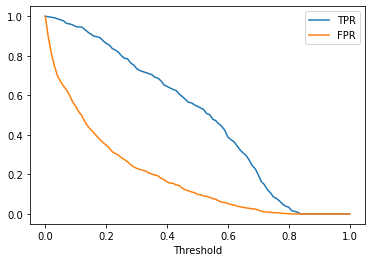

In [ ]:
plt.plot(df_scores['threshold'], df_scores['tpr'], label='TPR')
plt.plot(df_scores['threshold'], df_scores['fpr'], label='FPR')
plt.legend()
plt.xlabel('Threshold')
plt.show();

- TPR & FPR = 1  -> predicts everyone is churning

## Random Model

In [ ]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [ ]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

> As expected, very low accuracy since it made random predictions.

### Function for returning df

In [ ]:
def tpr_fpr_dataframe(y_val, y_pred):
  scores = []
  thresholds = np.linspace(0 ,1, 101)

  for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    # True predictions
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    # False predictions
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

  columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
  df_scores = pd.DataFrame(scores, columns = columns)

  df_scores['tpr'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])
  df_scores['fpr'] = df_scores['fp'] / (df_scores['fp'] + df_scores['tn'])

  return df_scores

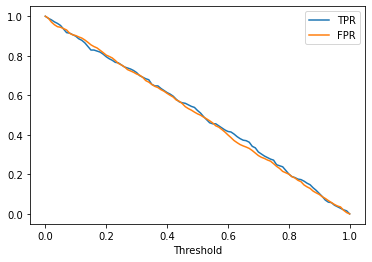

In [ ]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

plt.plot(df_rand['threshold'], df_rand['tpr'], label='TPR')
plt.plot(df_rand['threshold'], df_rand['fpr'], label='FPR')
plt.legend()
plt.xlabel('Threshold')
plt.show();

if t=0.6:

- In 60% of the cases the model predicts that the customer is non-churning.
- In 40% of the cases it predicts that the customer is churning.
- With a probability of 40% for a customer that is churning, it predicts that it's churning.
- With a probability of 60%, it predicts that the customer is non-churning.
- This means that in 40% of the cases this model is incorrect for non-churning ones.

## Ideal Model

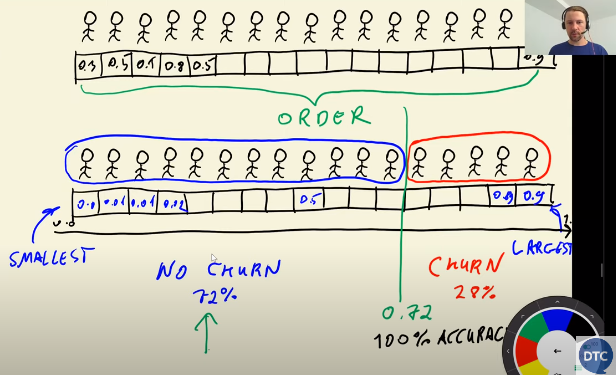

In [ ]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [ ]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [ ]:
1 - y_val.mean()

0.7260468417317246

In [ ]:
((y_ideal_pred >= 0.726)==y_ideal).mean()

1.0

In [ ]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

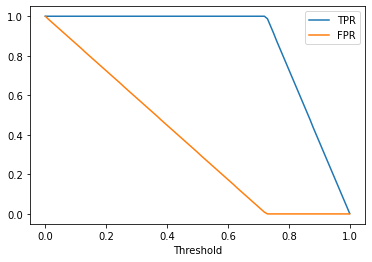

In [ ]:
plt.plot(df_ideal['threshold'], df_ideal['tpr'], label='TPR')
plt.plot(df_ideal['threshold'], df_ideal['fpr'], label='FPR')
plt.legend()
plt.xlabel('Threshold')
plt.show();

## Putting everything together

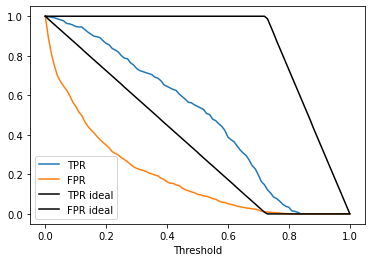

In [ ]:
plt.plot(df_scores['threshold'], df_scores['tpr'], label='TPR')
plt.plot(df_scores['threshold'], df_scores['fpr'], label='FPR')

# plt.plot(df_rand['threshold'], df_rand['tpr'], label='TPR')
# plt.plot(df_rand['threshold'], df_rand['fpr'], label='FPR')

plt.plot(df_ideal['threshold'], df_ideal['tpr'], label='TPR ideal', color='black')
plt.plot(df_ideal['threshold'], df_ideal['fpr'], label='FPR ideal', color='black')

plt.legend()
plt.xlabel('Threshold')
plt.show();

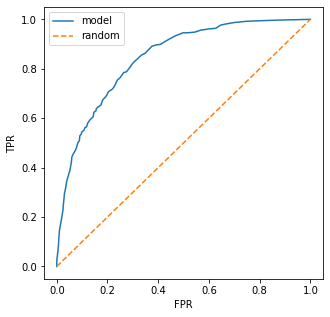

In [ ]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')

plt.plot([0,1], [0,1], label='random', linestyle='--')
# plt.plot(df_rand.fpr, df_rand.tpr, labels='model')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
plt.show();

> We want the curve to be as close as possible to the top left curve and as far as possible from the random baseline (orange line)

- The higher ^ we go, the lower the threshold. 
   - Bottom left: threshold is 1
   - Top right: threshold is 0

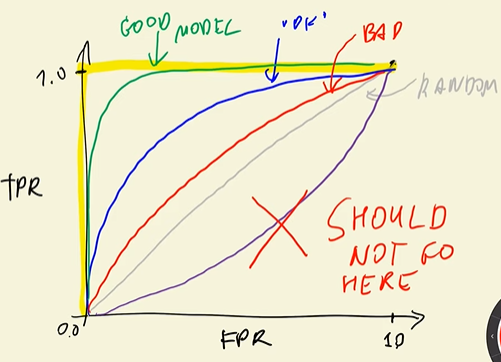

> If you see that a model goes below the random baseline, it means we should flip positives and negatives

# Using Sci-kit Learn

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

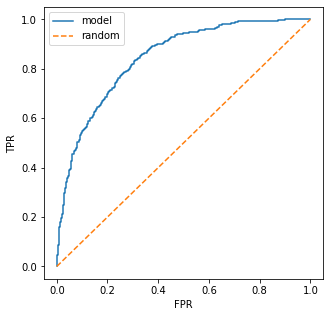

In [ ]:
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label='model')

plt.plot([0,1], [0,1], label='random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
plt.show();

# 4.6 ROC AUC
- Area under the ROC curve - useful metric
- Interpretation of AUC

One way of identifying how close we are to the ideal point (top left) in the ROC curve is measuring the **Area under the curve**

## Calculate using sklearn

In [ ]:
from sklearn.metrics import auc

In [ ]:
auc(fpr, tpr)

0.8438530381535563

In [ ]:
auc(df_scores.fpr, df_scores.tpr)

0.8438732975754537

In [ ]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8438530381535563

To write this in one line instead 👇

## sklearn calculation shortcut

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_val, y_pred)

0.8438530381535563

## AUC Interpretation
AUC tells us what is the probability that a randomly selected positive example has a score that is higher than a randomly selected negative example

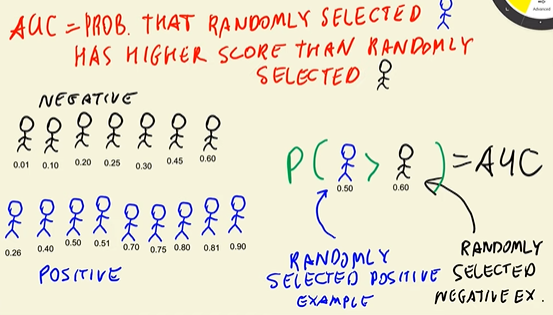

In [ ]:
# Positive and negative predictions
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [ ]:
# Randomly select examples
import random

n = 100000
success = 0

for i in range(n):
  pos_ind = random.randint(0, len(pos)-1)
  neg_ind = random.randint(0, len(neg)-1)
  # Compare the scores of positive and negative examples
  if pos[pos_ind] > neg[neg_ind]:
    success += 1
success/n

0.84355

In [ ]:
n = 50000
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

0.84486

# 4.7 Cross Validation
- Evaluating the same model on different subsets of data.
- Getting the average prediction and the spread within predictions

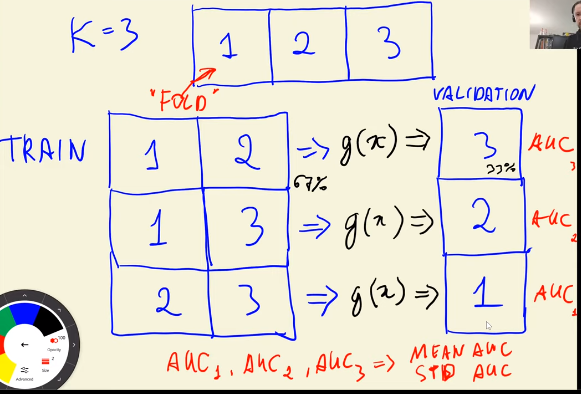

In [ ]:
# Train function
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [ ]:
dv, model = train(df_train, y_train, C=0.001)

In [ ]:
# Predict function
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [ ]:
y_pred = predict(df_val, dv, model)

## K-Fold

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:
# see progress of the iterations
# !pip install tqdm
from tqdm.auto import tqdm

In [ ]:
n_splits = 5
for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores = []
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.009
C=0.1 0.841 +- 0.007
C=0.5 0.840 +- 0.006
C=1 0.840 +- 0.008
C=5 0.841 +- 0.008
C=10 0.842 +- 0.008


In [ ]:
scores

[0.8437252239169172,
 0.8458461627598993,
 0.8325265904073851,
 0.8329702788258618,
 0.8525462018763139]

In [ ]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259

## When to use Cross-Validation?
For most of the time, usual normal validation is fine. If your dataset is smaller or you want to see how the standard deviation is and see how stable is the model, and how much it varries on different folds, then you can use Cross Validation.

For bigger datasets, number of folds can be 2 or 3, for smaller ones you might want to do more splits.

# 4.8 Summary
* Metric - a single number that describes the performance of a model
* Accuracy - fraction of correct answers; sometimes misleading 
* Precision and recall are less misleading when we have class inbalance
* ROC Curve - a way to evaluate the performance at all thresholds; okay to use with imbalance
* K-Fold CV - more reliable estimate for performance (mean + std)

## 4.9 Explore more

* Check the precision and recall of the dummy classifier that always predict "FALSE"
* F1 score = 2 * P * R / (P + R)
* Evaluate precision and recall at different thresholds, plot P vs R - this way you'll get the precision/recall curve (similar to ROC curve)
* Area under the PR curve is also a useful metric

Other projects:

* Calculate the metrics for datasets from the previous week